In [1]:
import pandas as pd

#Spacy is a pre-prep NLP library
import spacy
#loading English language module
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



#import CSV
data_raw = pd.read_csv('dialogs.csv', sep='\\t' )
data_input = data_raw["\"input"]


<ipython-input-1-ab9c08f80bbd>:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_raw = pd.read_csv('dialogs.csv', sep='\\t' )


In [2]:
#Clean CSV import
for x in range(len(data_input)):
   data_input.iloc[x] = data_input.iloc[x].strip("\"")

In [3]:
print(data_input)

0                                  hi, how are you doing?
1                           i'm fine. how about yourself?
2                     i'm pretty good. thanks for asking.
3                       no problem. so how have you been?
4                        i've been great. what about you?
                              ...                        
3720      that's a good question. maybe it's not old age.
3721                                are you right-handed?
3722                                    yes. all my life.
3723    you're wearing out your right hand. stop using...
3724          but i do all my writing with my right hand.
Name: "input, Length: 3725, dtype: object


In [4]:
#Convert input into spacy tokens - accses all indidual words as: [token.text for token in <input>]
data_spacy = data_input

for x in range(len(data_spacy)):
   data_spacy.iloc[x] = nlp(data_spacy.iloc[x])




In [5]:
data_raw = pd.read_csv('dialogs.csv', sep='\\t' )
data_text = data_raw["\"input"]
for x in range(len(data_text)):
   data_text.iloc[x] = data_text.iloc[x].strip("\"")

<ipython-input-5-5f822c865862>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_raw = pd.read_csv('dialogs.csv', sep='\\t' )


In [6]:
for x in range(len(data_spacy)):
    print ([(token.text, token.lemma_, token.pos_) for token in data_spacy[x]])

[('hi', 'hi', 'INTJ'), (',', ',', 'PUNCT'), ('how', 'how', 'ADV'), ('are', 'be', 'AUX'), ('you', 'you', 'PRON'), ('doing', 'do', 'VERB'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ("'m", 'be', 'VERB'), ('fine', 'fine', 'ADJ'), ('.', '.', 'PUNCT'), ('how', 'how', 'ADV'), ('about', 'about', 'ADP'), ('yourself', 'yourself', 'PRON'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ("'m", 'be', 'VERB'), ('pretty', 'pretty', 'ADV'), ('good', 'good', 'ADJ'), ('.', '.', 'PUNCT'), ('thanks', 'thank', 'NOUN'), ('for', 'for', 'ADP'), ('asking', 'ask', 'VERB'), ('.', '.', 'PUNCT')]
[('no', 'no', 'DET'), ('problem', 'problem', 'NOUN'), ('.', '.', 'PUNCT'), ('so', 'so', 'ADV'), ('how', 'how', 'ADV'), ('have', 'have', 'AUX'), ('you', 'you', 'PRON'), ('been', 'be', 'VERB'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ("'ve", "'ve", 'AUX'), ('been', 'be', 'VERB'), ('great', 'great', 'ADJ'), ('.', '.', 'PUNCT'), ('what', 'what', 'PRON'), ('about', 'about', 'ADP'), ('you', 'you', 'PRON'), ('?', '?', 'PUNCT')]
[(

[('of', 'of', 'ADP'), ('course', 'course', 'NOUN'), ('it', 'it', 'PRON'), ('did', 'do', 'VERB'), ('.', '.', 'PUNCT'), ('why', 'why', 'ADV'), ('stop', 'stop', 'VERB'), ('after', 'after', 'ADP'), ('you', 'you', 'PRON'), ("'ve", "'ve", 'AUX'), ('run', 'run', 'VERB'), ('over', 'over', 'ADP'), ('two', 'two', 'NUM'), ('people', 'people', 'NOUN'), ('?', '?', 'PUNCT')]
[('what', 'what', 'PRON'), ('happened', 'happen', 'VERB'), ('to', 'to', 'ADP'), ('your', 'your', 'PRON'), ('car', 'car', 'NOUN'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ('got', 'get', 'VERB'), ('a', 'a', 'DET'), ('dent', 'dent', 'NOUN'), ('in', 'in', 'ADP'), ('the', 'the', 'DET'), ('parking', 'parking', 'NOUN'), ('lot', 'lot', 'NOUN'), ('.', '.', 'PUNCT')]
[('how', 'how', 'ADV'), ('did', 'do', 'AUX'), ('you', 'you', 'PRON'), ('get', 'get', 'VERB'), ('it', 'it', 'PRON'), ('?', '?', 'PUNCT')]
[('i', 'I', 'PRON'), ('do', 'do', 'AUX'), ("n't", "n't", 'PART'), ('know', 'know', 'VERB'), ('.', '.', 'PUNCT'), ('maybe', 'maybe', 'ADV'

[('that', 'that', 'DET'), ("'s", 'be', 'AUX'), ('true', 'true', 'ADJ'), ('.', '.', 'PUNCT'), ('they', 'they', 'PRON'), ('promise', 'promise', 'VERB'), ('anything', 'anything', 'PRON'), ('just', 'just', 'ADV'), ('so', 'so', 'SCONJ'), ('they', 'they', 'PRON'), ('get', 'get', 'AUX'), ('elected', 'elect', 'VERB'), ('.', '.', 'PUNCT')]
[('and', 'and', 'CCONJ'), ('when', 'when', 'ADV'), ('elected', 'elect', 'VERB'), (',', ',', 'PUNCT'), ('they', 'they', 'PRON'), ('go', 'go', 'VERB'), ('their', 'their', 'PRON'), ('own', 'own', 'ADJ'), ('way', 'way', 'NOUN'), ('.', '.', 'PUNCT')]
[('they', 'they', 'PRON'), ('forget', 'forget', 'VERB'), ('who', 'who', 'PRON'), ('put', 'put', 'VERB'), ('them', 'they', 'PRON'), ('in', 'in', 'ADP'), ('power', 'power', 'NOUN'), ('.', '.', 'PUNCT')]
[('they', 'they', 'PRON'), ('forget', 'forget', 'VERB'), ('where', 'where', 'ADV'), ('they', 'they', 'PRON'), ('came', 'come', 'VERB'), ('from', 'from', 'ADP'), ('.', '.', 'PUNCT')]
[('that', 'that', 'DET'), ('election',

In [7]:
#Transform input via a weighted counting algorythm
vec = TfidfVectorizer() #kwarg: stop_words="english"
vec.fit(data_text)

features = vec.transform(data_text)

pd.DataFrame(vec.transform(data_text).toarray(), columns=sorted(vec.vocabulary_.keys()))

,00,000,01,10,100,101,11,12,120,13,...,york,you,young,your,yours,yourself,yuck,yy,zip,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.202390,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.605395,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.202886,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.218720,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.220185,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.127488,0.0,0.235368,0.0,0.000000,0.0,0.0,0.0,0.0


In [8]:
# Prediction Attempt 1: K-means
cls = MiniBatchKMeans(n_clusters=61)
cls.fit(features)


MiniBatchKMeans(n_clusters=61)

In [9]:
cls.predict(features)



array([36, 36, 30, ...,  7, 25, 14])

In [10]:
# Show example cluster
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data_text.index.values
cluster_map['text'] = data_text.values
cluster_map['cluster'] = cls.labels_

cluster_map[cluster_map.cluster == 1]

,data_index,text,cluster
68,68,why is that?,1
141,141,why haven't you answered the phone?,1
210,210,why didn't you go to school yesterday?,1
314,314,"oh, why is that?",1
325,325,is that right? why?,1
...,...,...,...
3451,3451,why's that?,1
3521,3521,why?,1
3528,3528,why do they hurt?,1
3592,3592,i know that.,1


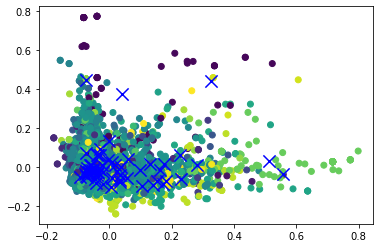

In [11]:
# reduce the cluster centers to 2D using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter( reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


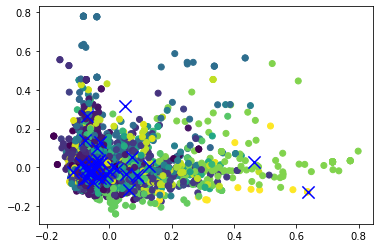

In [12]:
#K-means 43 cluser result (rather than 61)
cls = MiniBatchKMeans(n_clusters=43)
cls.fit(features)
cls.predict(features)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter( reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


In [13]:
# Prediction Attempt 2: MoG
from sklearn import mixture

clG =  mixture.BayesianGaussianMixture(n_components=5, covariance_type='full') 
clG.fit( features.toarray()) #.toarray()



BayesianGaussianMixture(n_components=5)

In [14]:
# Plot MoG model (one and done)
import itertools
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title)


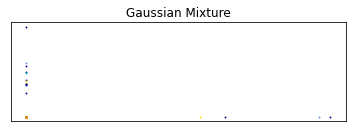

In [15]:
plot_results(features.toarray(), clG.predict(features.toarray()), clG.means_, clG.covariances_, 1,
             'Gaussian Mixture')